# Part 1

In [18]:
!pip install seaborn
import warnings
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Adding all data files
prob_results = pd.read_csv('RecessionIndicator.csv', index_col=0)
appendix = pd.read_csv('FRED-MD-Appendix.csv')

# Limit the appendix to only financial variables (group 8).
financial_vars = appendix[appendix['group'] == 8]

In [19]:
# Load the '2023-09-TF.csv' CSV file into a DataFrame.
FRED_TF = pd.read_csv('2023-09-TF.csv', header=0)

# Make the'sasdate' column the index.
FRED_TF = FRED_TF.set_index('sasdate')

# Convert the index to a monthly-frequency PeriodIndex.
FRED_TF.index = pd.PeriodIndex(FRED_TF.index, freq='M')


In [30]:
# Loop for each financial variable
for var in financial_vars['fred']:
    # Choose a time frame for the financial variable.
    y = FRED_TF[var]['2005-02':'2021-02']
    y = y.values.reshape(-1, 1)

    # Delay recession probabilities by one month.
    x = prob_results.shift(1)
    x = x.dropna()

    # To x, add a constant term.
    X = sm.add_constant(x)

    # Create a linear regression model with OLS.
    model = sm.OLS(y, X)
    results = model.fit()
    
    print(results.summary())


    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     15.58
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           0.000111
Time:                        02:54:23   Log-Likelihood:                 361.30
No. Observations:                 193   AIC:                            -718.6
Df Residuals:                     191   BIC:                            -712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0125      0.003      3.982      0.0

# Part 2

In [31]:
# Loop through each financial variable
for var in financial_vars['fred']:
    # Choose a time period and reshape y
    y = FRED_TF[var]['2005-02':'2021-02'].values.reshape(-1, 1)

    # Generate the first lag of the financial variable and eliminate NaN values.
    x = FRED_TF[var].shift(1)['2005-02':'2021-02'].dropna()

    # To x, add a constant term.
    X = sm.add_constant(x)

    # Create a linear regression model with OLS.
    model = sm.OLS(y, X)
    results = model.fit()

    print(f"Summary for {var}:")
    print(results.summary())


Summary for S&P 500:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     8.492
Date:                Mon, 08 Jan 2024   Prob (F-statistic):            0.00399
Time:                        02:56:04   Log-Likelihood:                 357.93
No. Observations:                 193   AIC:                            -711.9
Df Residuals:                     191   BIC:                            -705.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0049      0.00

# Part 3

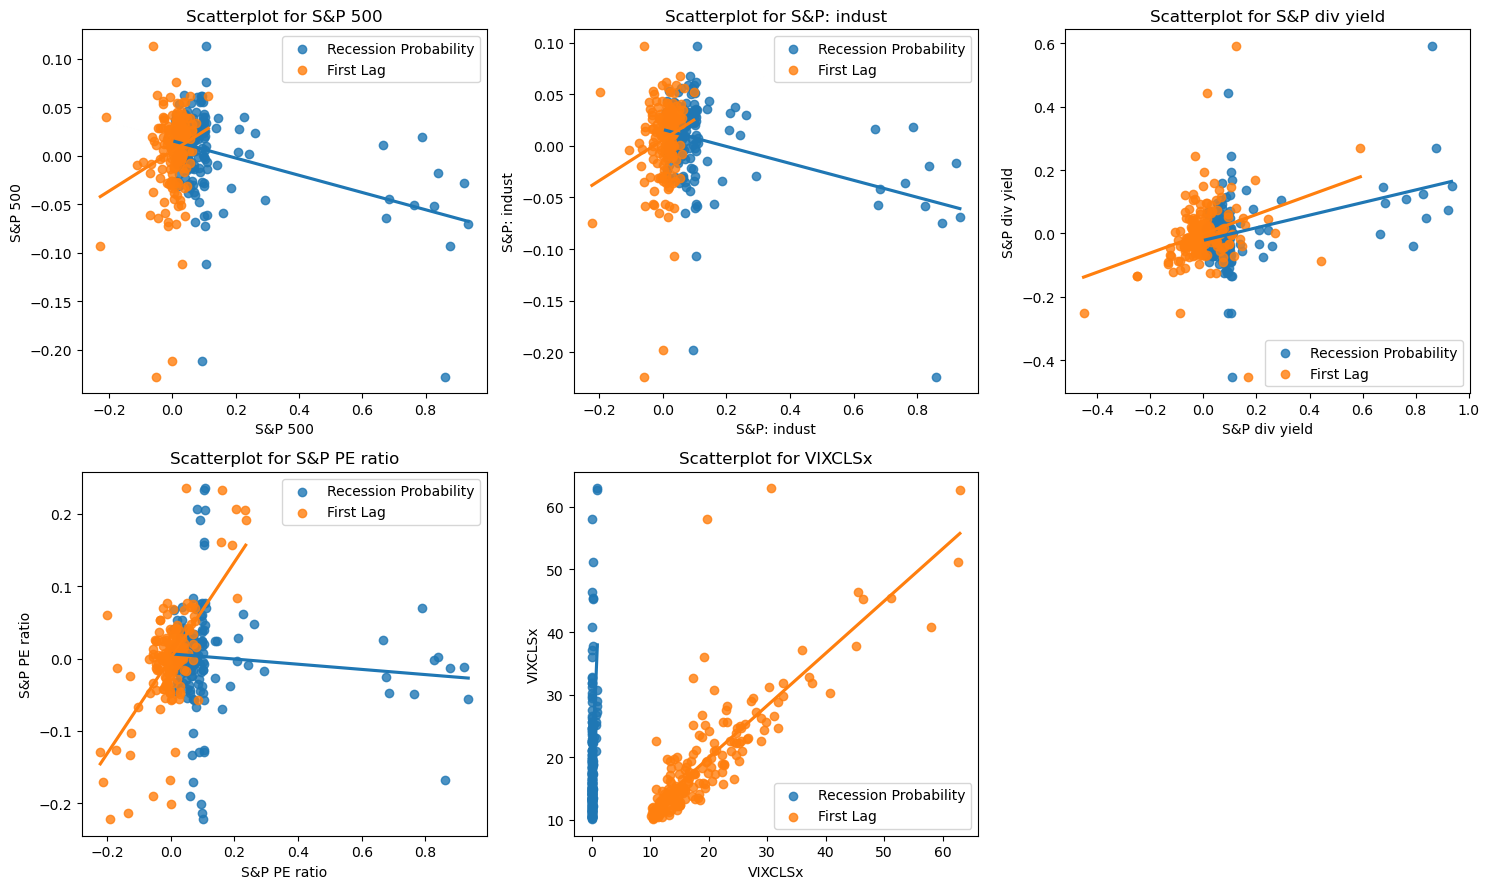

In [39]:
# Determine the size of the figure.
fig = plt.figure(figsize=(15, 9))

# Repeat for each financial variable
for i, var in enumerate(financial_vars['fred']):
    # Make a separate plot for each variable.
    plt.subplot(2, 3, i+1)
    
    # Create a scatterplot using the recession probability model.
    sns.regplot(x=prob_results['SVC'], y=FRED_TF[var]['2005-01':'2021-02'], ci=None, label='Recession Probability')
    
    # Create a scatterplot using the first lag model.
    sns.regplot(x=FRED_TF[var].shift(1)['2005-02':'2021-02'], y=FRED_TF[var]['2005-02':'2021-02'], ci=None, label='First Lag')
    
    # Include the title and legend.
    plt.title(f"Scatterplot for {var}")
    plt.legend()
    

plt.tight_layout()
plt.show()


# Question 4

1Time-Series Forecasting using Ordinary Least Squares (OLS) Models:
   The process involves using code developed by ChatGPT to do the main operation of importing and preparing the FRED-MD financial information. This method involves crucial stages such as converting date-time formats and establishing 'sasdate' as the index to match the structure of the dataset. The subsequent stage involves the development and fine-tuning of Ordinary Least Squares (OLS) models. This phase is crucial because it involves making customisations such as integrating delayed recession probability and ensuring that the models are properly tailored to the unique characteristics of the data.
   Following that, the attention turns into assessing the effectiveness of the model. In this approach, the technique involves calculating R-squared statistics and including an adjustment phase to include predicting mistakes, resulting in a thorough performance review. The findings of this study are diligently saved in a CSV file (fcast_res.csv) for further consultation.
  In order to improve the comprehensibility of these findings, visualisation approaches are used. These visual aids, generated using charting scripts given by ChatGPT, provide a concrete representation of the regression results, enhancing comprehension. The result of this technique is a complex combination of automatic code creation and human intellectual input, guaranteeing a detailed and comprehensive analysis of time-series forecasting utilising OLS models.
  
2.Classification Modelling and Evaluation Approach: The process of classification modelling begins with thorough data preparation and standardisation, which involves important tasks such as renaming columns, changing date formats, and building suitable indices. The first phase is vital for establishing data consistency and dependability, laying the groundwork for successful modelling.
   The essence of the technique is centred on feature engineering and model fitting. The financial information is analysed using the Principal Component Analysis to uncover crucial aspects. Subsequently, advanced models such as Logistic Regression and Support Vector Classifier (SVC) are used. The primary objective is to save the resulting probabilities in a well-structured DataFrame, which is then stored in a csv file named "RecessionIndicator.csv".  The concluding stage is storing the results in a CSV file and displaying specific information on the chosen model. The use of an iterative procedure, which includes a well-organized coding structure and detailed comments, highlights a methodical and perceptive approach to categorization modelling. The text emphasises the smooth incorporation of fundamental code snippets from ChatGPT with human-driven modifications, leading to a strong and well-informed process of modelling and assessment.
   
3.Methodology for Investigating Financial Variables using Regression:
   This portion of the project focuses on examining financial factors via regression analysis. The first phase entails a meticulous selection of financial variables and the adjustment of recession probabilities to synchronise them with the financial data, guaranteeing the analysis's relevance and precision.
   The primary analytical task is doing Ordinary Least Squares (OLS) regression for each selected financial indicator, using the lagged recession probability as a crucial element. This is enhanced by using models that have a lag of 1 for each financial indicator, providing a thorough perspective on their behaviour and trends.
      The use of ChatGPT's code-generation capabilities and human analytical talents is shown well via this technique, which explores financial factors and their interrelations. The text provides a detailed comprehension of how financial factors react to changes in the likelihood of a recession, supported by a robust framework of tools for visualising and storing data.